# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** AHMAD JIBRIL ABDUL AZIZ
- **Email:** m008d4ky3189@bangkit.academy // ahmadjibril02@mail.ugm.ac.id
- **ID Dicoding:** ahmadjibril02

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apa State dengan jumlah order tertinggi?
- Pertanyaan 2 : Tipe pembayaran jenis apa yang paling banyak digemari?

## Import Semua Packages/Library yang Digunakan

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data [Imported from GDrive]

In [73]:
from google.colab import drive
drive.mount('/drive')

customers_df = pd.read_csv('/drive/MyDrive/Proyek Analisis Data/customers_dataset.csv')
customers_df.head()

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [74]:
order_payments_df = pd.read_csv('/drive/MyDrive/Proyek Analisis Data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [75]:
orders_df = pd.read_csv('/drive/MyDrive/Proyek Analisis Data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Assessing Data

#### Menilai tabel `customers_df`

In [76]:
customers_df.info()
#customers_df.isna().sum()
#print("Jumlah duplikasi: ", customers_df.duplicated().sum())
#customers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Pada data customers, tidak ditemukan keanehan apapun. Mulai dari datatype yang tepat, tidak adanya missing value, inaccurate value dan juga data duplikat.**

#### Menilai tabel `order_payments_df`

In [77]:
order_payments_df.info()
#order_payments_df.isna().sum()
#print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
#order_payments_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Untuk data pada order_payments_df ini tidak terdapat kejanggalan tertentu, missing value tidak ada, inaccurate value juga aman, data duplikat nol, serta semua datatype sudah tepat.**

#### Menilai tabel `orders_df`

In [78]:
orders_df.info()
orders_df.isna().sum()
#print("Jumlah duplikasi: ", orders_df.duplicated().sum())
#orders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Terdapat problem, dimana datatype salah yang seharusnya timestamp. Dan juga adanya missing value.**

### Cleaning Data

In [79]:
#orders_df.isna().sum()
#orders_df[orders_df.order_approved_at.isna()]
#orders_df[orders_df.order_delivered_carrier_date.isna()]
#orders_df[orders_df.order_delivered_customer_date.isna()]
orders_df.dropna(inplace=True)
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

**Disini saya memutuskan untuk drop karena menurut saya missing value yang ada tidak akan terlalu berpengaruh untuk analisis saya kedepannya.**

In [80]:
  ## Nampaknya format untuk shipping_limit_date kurang tepat yang dimana harusnya adalah datetime
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [81]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
6178,0b8eb01b2a378b535126bdf817eb1761,ad7e2fa70d0db12bce950350ebc0e242,13177,sumare,SP
48241,28227e8679c1c660c0d6da04867e63d5,96ece00b49a7f817903397dea56500df,51021,recife,PE
85089,d375691b753ce7bc99190bc08b813003,cef29e793e232d30250331804cdb7000,30620,belo horizonte,MG
835,52948975a1c8e2ec193e83fba7d4d091,313fc07d700930f4fbb8c08c5f5ebc20,81270,curitiba,PR
3930,3db805014861b40ee4e4e82e8d7ae5f5,e45f7706f5e37da923c14f3a4bff40c6,25882,anta,RJ


In [82]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [83]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [84]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).head(3)

customer_state
SP    41746
RJ    12852
MG    11635
Name: customer_id, dtype: int64

### Explore `order_payments_df`

In [85]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4394,a7c661b33cd26dc2d0fb5dd1fd34982e,1,credit_card,1,108.67
5184,147e9f4682b02a1b8ef314d880654b45,1,credit_card,1,47.29
44996,65b214a5e85949a6fcab64ff7e244426,1,credit_card,3,77.72
65121,0b8f8315c63f765c07a31a8c7e28bad0,1,voucher,1,50.73
15438,1a93b2b046feffab15c313a7c3f73504,1,credit_card,5,58.59


In [86]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [87]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [88]:
order_payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["max", "min", "mean" ]
})

order_id payment_value                   
              nunique           max    min        mean
payment_type                                          
boleto          19784       7274.88  11.62  145.034435
credit_card     76505      13664.08   0.01  163.319021
debit_card       1528       4445.50  13.38  142.570170
not_defined         3          0.00   0.00    0.000000
voucher          3866       3184.34   0.00   65.703354

**Jika diperhatikan, meskipun penggunaan debit_card adalah yang terendah, nilai rata-rata dari payment_valuenya cukup tinggi.**

In [89]:
order_payments_df.corr()

<ipython-input-89-7b61a1a36efd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  order_payments_df.corr()


,payment_sequential,payment_installments,payment_value
payment_sequential,1.000000,-0.086363,-0.069593
payment_installments,-0.086363,1.000000,0.330811
payment_value,-0.069593,0.330811,1.000000


**Untuk mengetahui korelasi dari kolom tersebut, dan diketahui bahwa payment_sequential berkorelasi negatif dengan payment_value. Untuk korelasi lainnya kurang ada hal yang menarik.**

### Explore `orders_df`

In [90]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
51724,cf2bdd96e31b79ed41dba723fb42429a,17d47ffa534a47c9af375bd1bb9cd94b,delivered,2018-08-06 16:03:21,2018-08-08 07:30:09,2018-08-08 13:27:00,2018-08-16 21:27:40,2018-08-27
11716,f2e689a11a0a962aa271e7715b516ee2,37eb443380c8aba9174ef0dbe858fbe4,delivered,2018-08-06 20:19:36,2018-08-07 20:15:22,2018-08-08 13:43:00,2018-08-16 16:27:45,2018-08-31
59061,beecb33087d159cc2dc627ff4a1fb9e1,83730488524b0398123e465b5b9b3e7b,delivered,2018-01-21 01:39:34,2018-01-23 03:52:42,2018-01-26 20:27:05,2018-02-05 13:29:43,2018-02-15
44630,a70b9ff516da648dcee359a50611fe6d,d3501374dbb088ca22910d940ce4abb9,delivered,2018-03-07 09:39:07,2018-03-07 10:20:22,2018-03-12 19:18:51,2018-03-28 23:18:24,2018-04-02
52040,c8f75f6121e5b471d9e207771a2a5367,b30e3e8812362ce2ed4e73ade06a089e,delivered,2018-08-02 12:06:30,2018-08-02 13:04:23,2018-08-03 14:53:00,2018-08-04 15:26:31,2018-08-07


In [91]:
orders_df.describe(include="all")

<ipython-input-91-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-91-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-91-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-91-903538279252>:1: FutureWarni

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,95939,88272,80100,95649,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96455,3,9,47,3,507
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [92]:
orders_df['waktu_beli'] = orders_df['order_purchase_timestamp'].dt.hour.apply(lambda x: 'pagi' if 6 <= x < 12 else ('siang' if 12 <= x < 18 else ('malam' if 18 <= x < 24 else 'dini hari')))

In [93]:
orders_df.groupby(by="waktu_beli").order_id.nunique()

waktu_beli
dini hari     4594
malam        33105
pagi         21591
siang        37171
Name: order_id, dtype: int64

<Axes: >

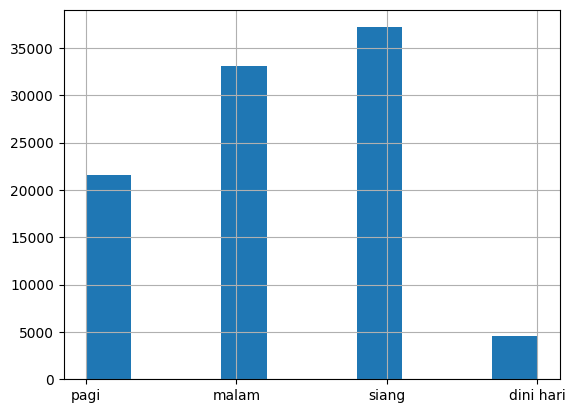

In [94]:
orders_df.waktu_beli.hist()

**Saya cukup penasaran dengan waktu beli ini, dan ternyata hasilnya diluar ekspektasi saya dimana saya kira malam akan menjadi waktu order paling banyak.**

In [95]:
orders_df['tahun'] = orders_df['order_purchase_timestamp'].dt.year

In [96]:
order_per_tahun = orders_df.groupby('tahun').size().reset_index(name='order_per_tahun')
print(order_per_tahun)

   tahun  order_per_tahun
0   2016              272
1   2017            43411
2   2018            52778


**Hasil ini dapat digunakan untuk analisis lebih lanjut dan merupakan kabar baik karena tingkat jumlah order per tahun terus meningkat.**

### Explore `orders_df` & `customers_df`

In [97]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,waktu_beli,tahun,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,pagi,2017,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,malam,2018,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,pagi,2018,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,malam,2017,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,malam,2018,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [98]:
orders_customers_df.describe(include="all")

<ipython-input-98-241aa08b2c42>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_customers_df.describe(include="all")
<ipython-input-98-241aa08b2c42>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_customers_df.describe(include="all")
<ipython-input-98-241aa08b2c42>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_customers_df.describe(include="all")
<ipython-input-9

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,waktu_beli,tahun,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,96461,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000,96461,96461.000000,96461,96461
unique,96461,96461,2,95939,88272,80100,95649,445,4,NaN,93342,NaN,4085,27
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00,siang,NaN,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,1,96455,3,9,47,3,507,37171,NaN,15,NaN,15044,40489
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.544324,NaN,35198.925825,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.503664,NaN,29839.654761,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,11355.000000,NaN,NaN


In [99]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(3)

customer_state
SP    40489
RJ    12351
MG    11352
Name: order_id, dtype: int64

In [100]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(3)

customer_city
sao paulo         15044
rio de janeiro     6603
belo horizonte     2697
Name: order_id, dtype: int64

**Meskipun pola yang dihasilkan dari hasil groupby dataframe ini dengan hanya dataframe asal adalah sama, saya perlu untuk melakukan penggabungan demi menyelaraskan informasi dan valuenya sehingga tidak ada analisa yang kurang tepat dan tanpa dasa.r**

### Explore `orders_df` & `order_payments_df`

In [101]:
orders_payments_df = pd.merge(
    left=orders_df,
    right=order_payments_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
orders_payments_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,waktu_beli,tahun,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,pagi,2017,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,pagi,2017,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,pagi,2017,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,malam,2018,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,pagi,2018,1,credit_card,3,179.12


In [102]:
orders_payments_df.describe(include="all")

<ipython-input-102-dc75cca86e15>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_payments_df.describe(include="all")
<ipython-input-102-dc75cca86e15>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_payments_df.describe(include="all")
<ipython-input-102-dc75cca86e15>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_payments_df.describe(include="all")
<ipython-input-1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,waktu_beli,tahun,payment_sequential,payment_type,payment_installments,payment_value
count,100739,100739,100739,100739,100739,100739,100739,100739,100739,100739.000000,100739.000000,100739,100739.000000,100739.000000
unique,96460,96460,2,95938,88271,80099,95648,444,4,NaN,NaN,4,NaN,NaN
top,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,delivered,2017-06-07 12:05:10,2017-06-09 16:15:08,2018-05-09 15:48:00,2017-06-22 16:04:46,2017-12-20 00:00:00,siang,NaN,NaN,credit_card,NaN,NaN
freq,26,26,100733,26,26,47,26,547,38711,NaN,NaN,74584,NaN,NaN
first,NaN,NaN,NaN,2016-10-03 09:44:50,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.540555,1.088387,NaN,2.851894,153.065673
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.504059,0.652783,NaN,2.684496,214.465614
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,1.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,1.000000,NaN,1.000000,56.780000


In [103]:
orders_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    74302
boleto         19177
voucher         3679
debit_card      1484
Name: order_id, dtype: int64

**Sama halnya dengan sebelumnya, ternyata hasil penggabungan menunjukkan pola hasil yang tertinggi yang sama.**

### Menghubungkan semua data

In [104]:
all_ins_df = pd.merge(
    left=orders_customers_df,
    right=order_payments_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
all_ins_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,waktu_beli,tahun,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,pagi,2017,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,pagi,2017,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,pagi,2017,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,malam,2018,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,pagi,2018,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12


In [109]:
#tabel_frekuensi = pd.pivot_table(all_ins_df, index='customer_state', columns='payment_type', aggfunc='size', fill_value=0)
#print(tabel_frekuensi)

## HANYA COBA COBA

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa State dan atau City dengan jumlah order tertinggi?

In [106]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).head(3)
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).head(3)

customer_state
SP    41746
RJ    12852
MG    11635
Name: customer_id, dtype: int64

In [107]:
city_customer_counts = customers_df['customer_city'].value_counts()
highest_city_customer_counts = city_customer_counts.head(5)

state_customer_counts = customers_df['customer_state'].value_counts()
highest_state_customer_counts = state_customer_counts.head(5)

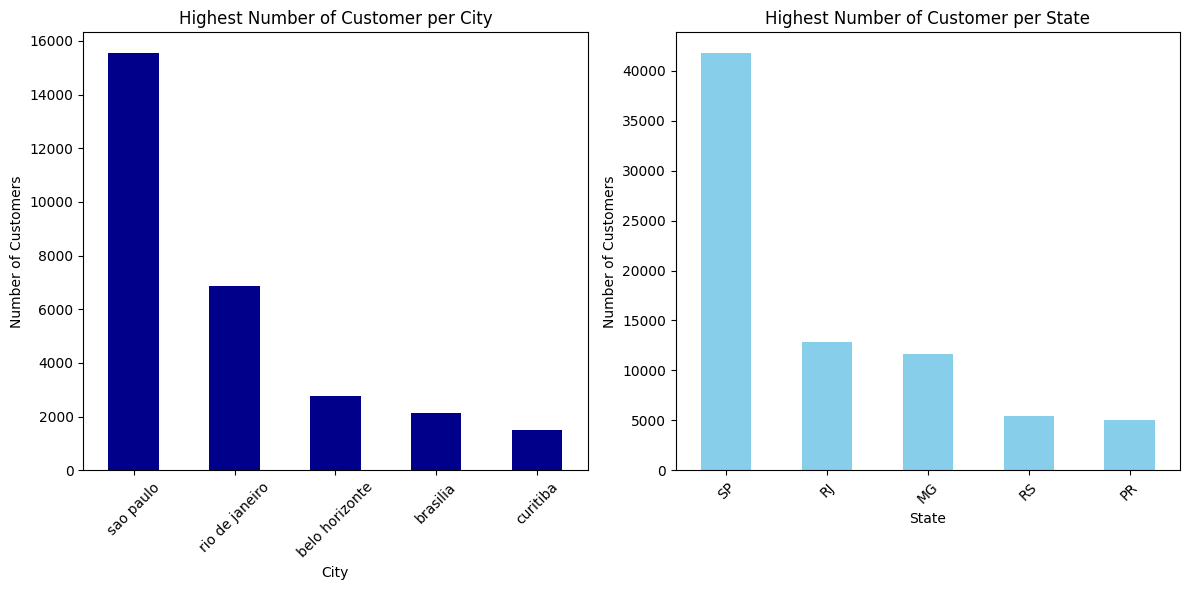

In [108]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
highest_city_customer_counts.sort_values(ascending=False).plot(kind='bar', color='darkblue')
plt.title('Highest Number of Customer per City')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
highest_state_customer_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Highest Number of Customer per State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

plt.tight_layout()  # Agar subplot tidak tumpang tindih
plt.show()

**Dari hasil tersebut nampak city dengan jumlah customer tertinggi dan juga state dengan jumlah customer tertinggi.**

In [110]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(3)
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(3)

customer_state
SP    40489
RJ    12351
MG    11352
Name: order_id, dtype: int64

In [111]:
city_order_counts = orders_customers_df['customer_city'].value_counts()
highest_city_order_counts = city_order_counts.head(5)

state_order_counts = orders_customers_df['customer_state'].value_counts()
highest_state_order_counts = state_order_counts.head(5)

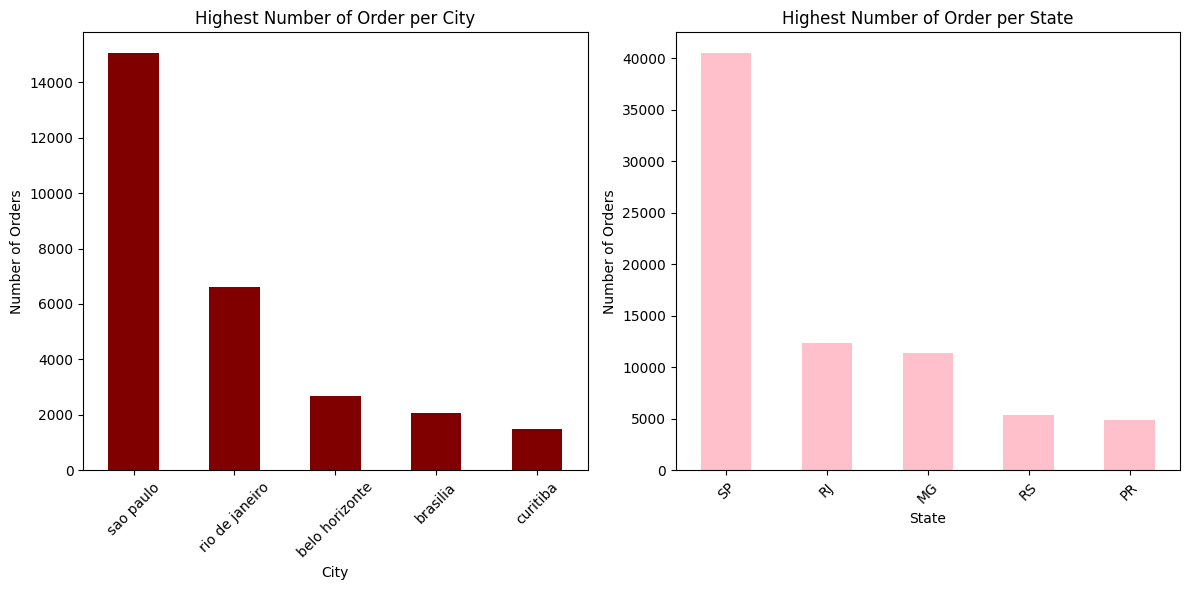

In [112]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
highest_city_order_counts.sort_values(ascending=False).plot(kind='bar', color='maroon')
plt.title('Highest Number of Order per City')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
highest_state_order_counts.sort_values(ascending=False).plot(kind='bar', color='pink')
plt.title('Highest Number of Order per State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

plt.tight_layout()  # Agar subplot tidak tumpang tindih
plt.show()

**Setelah melakukan plot untuk data customer sebelumnya, dan melakukan plot untuk hasil pada data orders, ternyata didapatkan hasil yang serupa dengan pola yang sama. Dimana Sao Paulo menjadi City dengan jumlah order tertinggi, dan SP sebagai State dengan jumlah order tertinggi.**

### Pertanyaan 2: Tipe pembayaran jenis apa yang paling banyak digemari?

In [113]:
order_payments_counts = orders_payments_df['payment_type'].value_counts()
rank_payments = order_payments_counts.head(4)

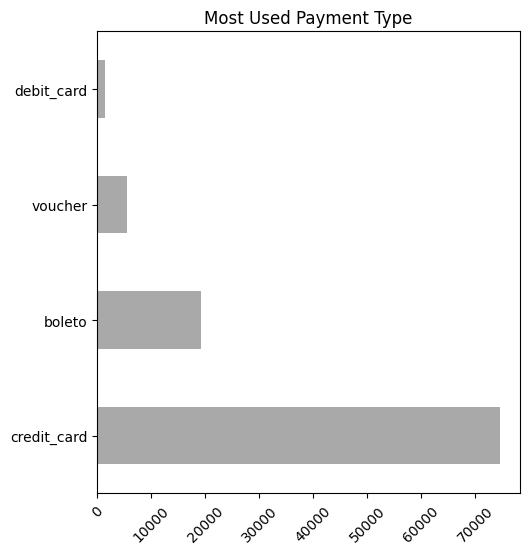

In [114]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
rank_payments.sort_values(ascending=False).plot(kind='barh', color='darkgrey')
plt.title('Most Used Payment Type')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45)
plt.show()

### Analisis RFM

In [115]:
rfm_df = all_ins_df.groupby(by="customer_state", as_index=False).agg({
    "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "payment_value": "sum"
})
rfm_df.columns = ["customer_state", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_state,max_order_timestamp,frequency,monetary
0,AC,2018-08-21 16:31:46,80,19586.25
1,AL,2018-08-15 00:26:03,397,94195.79
2,AM,2018-08-14 16:18:52,145,27596.18
3,AP,2018-08-16 08:17:15,67,16141.81
4,BA,2018-08-21 23:24:29,3256,591270.60


In [116]:
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_state,max_order_timestamp,frequency,monetary,recency
0,AC,2018-08-21,80,19586.25,8
1,AL,2018-08-15,397,94195.79,14
2,AM,2018-08-14,145,27596.18,15
3,AP,2018-08-16,67,16141.81,13
4,BA,2018-08-21,3256,591270.60,8


In [117]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_state,frequency,monetary,recency
0,AC,80,19586.25,8
1,AL,397,94195.79,14
2,AM,145,27596.18,15
3,AP,67,16141.81,13
4,BA,3256,591270.60,8


In [118]:
rfm_df.describe()

,frequency,monetary,recency
count,27.000000,2.700000e+01,27.000000
mean,3572.592593,5.710994e+05,7.851852
std,8019.648651,1.155908e+06,7.393884
min,41.000000,9.039520e+03,0.000000
25%,366.000000,8.224246e+04,3.500000
50%,886.000000,1.814417e+05,6.000000
75%,2668.000000,4.687084e+05,11.000000
max,40488.000000,5.768355e+06,37.000000


In [119]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_state,frequency,monetary,recency
17,PR,4923,781919.55,0
10,MG,11352,1819029.99,0
25,SP,40488,5768355.09,0
22,RS,5342,861054.35,1
18,RJ,12351,2055878.41,1


In [120]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_state,frequency,monetary,recency
25,SP,40488,5768355.09,0
18,RJ,12351,2055878.41,1
10,MG,11352,1819029.99,0
22,RS,5342,861054.35,1
17,PR,4923,781919.55,0


**Untuk bagian Frequency saya biarkan karena semua customer_id sesuai dengan orders_id hanya melakukan masing masing 1 kali pembelian sehingga semua Freqeuency sama dengan 1.**

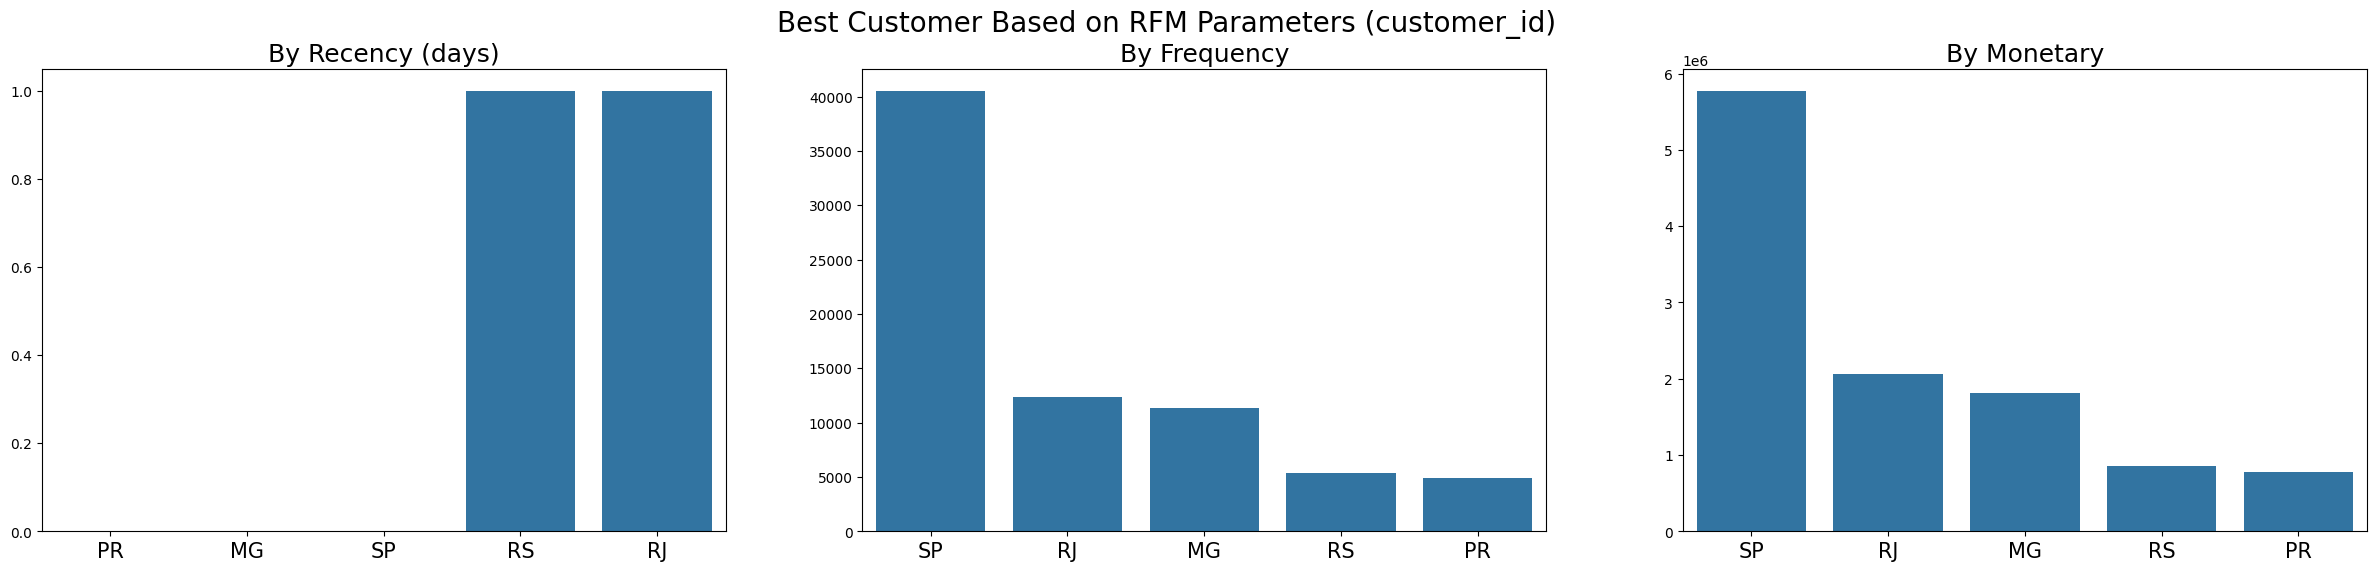

In [122]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(y="recency", x="customer_state", data=rfm_df.sort_values(by="recency", ascending=True).head(5), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_state", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_state", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Dari hasil diatas terlihat bahwa siapa customer_id dengan Recency paling rendah, atau bisa dibilang yang merupakan pembeli terbaru. Untuk Monetary adalah customer_id dengan payment_value tertinggi. Sedangkan untuk Frequency pada dasarnya acak karena kesemua nilainya sama dengan 1.**

In [123]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_state,frequency,monetary,recency,r_rank,f_rank,m_rank
0,AC,80,19586.25,8,11.0,3.0,3.0
1,AL,397,94195.79,14,3.0,8.0,8.0
2,AM,145,27596.18,15,2.0,4.0,4.0
3,AP,67,16141.81,13,5.0,2.0,2.0
4,BA,3256,591270.60,8,11.0,21.0,21.0


In [124]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_state,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,AC,80,19586.25,8,42.307692,11.111111,11.111111
1,AL,397,94195.79,14,11.538462,29.629630,29.629630
2,AM,145,27596.18,15,7.692308,14.814815,14.814815
3,AP,67,16141.81,13,19.230769,7.407407,7.407407
4,BA,3256,591270.60,8,42.307692,77.777778,77.777778


In [125]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.5
rfm_df = rfm_df.round(2)
rfm_df[['customer_state', 'RFM_score']].head(7)

,customer_state,RFM_score
0,AC,7.90
1,AL,13.46
2,AM,6.87
3,AP,4.59
4,BA,36.23
5,CE,29.66
6,DF,37.54


**Rumus perhitungan hanyalah  untuk RFM score hanyalah untuk keperluan analisis belaka, jika ada perbedaan tentu hanyalah hasil dari saya sendiri**

In [126]:
rfm_df["state_segment"] = np.where(
    rfm_df['RFM_score'] > 45, "Elite State", (np.where(
        rfm_df['RFM_score'] > 40, "Pro State",(np.where(
            rfm_df['RFM_score'] > 30, "Uncommon State", np.where(
                rfm_df['RFM_score'] > 16, 'Common State', 'Poor State'))))))

rfm_df[['customer_state', 'RFM_score', 'state_segment']].head(20)

,customer_state,RFM_score,state_segment
0,AC,7.90,Poor State
1,AL,13.46,Poor State
2,AM,6.87,Poor State
3,AP,4.59,Poor State
4,BA,36.23,Uncommon State
5,CE,29.66,Common State
6,DF,37.54,Uncommon State
7,ES,34.62,Uncommon State
8,GO,34.73,Uncommon State
9,MA,24.93,Common State


In [127]:
state_segment_df = rfm_df.groupby(by="state_segment", as_index=False).customer_state.nunique()
state_segment_df

,state_segment,customer_state
0,Common State,8
1,Elite State,3
2,Poor State,8
3,Pro State,3
4,Uncommon State,5


In [128]:
state_segment_df['state_segment'] = pd.Categorical(state_segment_df['state_segment'], [
    "Poor State", "Common State", "Uncommon State",
    "Pro State", "Elite State"
])

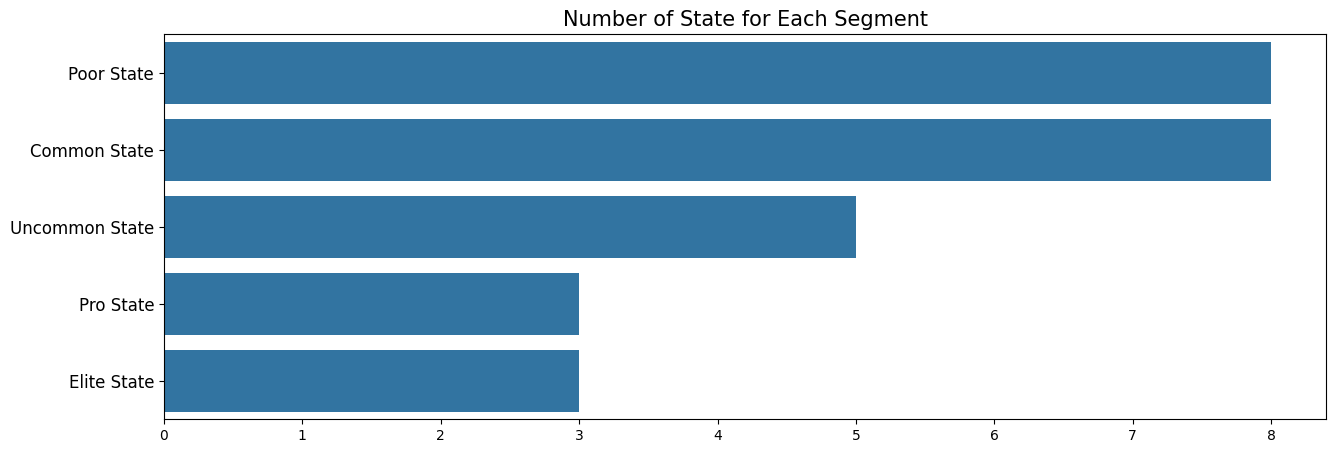

In [129]:
plt.figure(figsize=(15, 5))

sns.barplot(
    x="customer_state",
    y="state_segment",
    data=state_segment_df.sort_values(by="state_segment", ascending=False),
)
plt.title("Number of State for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

**- Conclution pertanyaan 1 : Berdasarkan hasil analisis data diatas, dapat disimpulkan bahwa city dengan jumlah order tertinggi adalah Sao Paulo dan state dengan order tertinggi adalah SP. Hal ini ternyata seiring dengan jumlah customer yang ada pada city dan juga statenya.**

**- Conclution pertanyaan 2 : Tipe pembayaran yang paling banyak digunakan untuk melakukan order adalah credit card, dan debit_card menjadi pilihan dengan jumlah paling sedikit digunakan.**

**Selain menjawab pertanyaan tersebut, ditemukan beberapa hal yang cukup menarik juga yang dapat di analisis lebih lanjut, seperti mayoritas order yang dilakukan adalah di siang hari dibandingkan pada malam hari.Selain itu, jumlah order yang dilakukan per tahun di e-commerce mengalami peningkatan yang dimana memungkinkan kedepannya akan terus tumbuh.**

**Dan tentunya ada analisis RFM yang dapat mengamati state dan segmentasinya. Dimana mayoritas dari state ternyata merupakan state yang "miskin" yang cenderung merupakan kaum bawah dengan payment_value tidak tinggi dan tidak sering melakukan order. Hasil hasil ini dapat digunakan untuk banyak hal dan masih banyak paluang analisis lainnya.**

In [130]:
all_ins_df.to_csv("all_data.csv", index=False)